### Prerequisites

This example remain simple, but you will need to install a small number of dependencies.
In particular these are:
    
* `(py)torch`: The core framework that implements most of the neural network building blocks.
* `numpy`: Which provides efficient handling of numeric data.
* `matplotlib`: A library to generate graphs to visualizes data and results.

In [13]:
!pip install scikit-learn
!pip install dtreeviz

You should consider upgrading via the '/home/pq/AIM/training/Hands-On ML Bootstrap/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/pq/AIM/training/Hands-On ML Bootstrap/venv/bin/python3 -m pip install --upgrade pip' command.


### Please check if all the dependencies are working:

If this raises an error, please reach out so we can help ;)

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

import pandas as pd

plt.style.use('seaborn')
#seaborn.set()

## A Basic Example

We begin with a simple example to get familier with the Python ecosystem that already provides you with various flexible implementations of different machine learning algorithms such as decision trees.

In [15]:
# Here we generate some basic data by ourselfs, as this allows us to sidestep many issues you might run in with real data which may need to be cleaned
# and distracts from learning about a machine learning method. It also alows to you play around and train your intuition to learn about strengths 
# but also weaknesses of a particular method ;)

from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=300,     # number of total samples to generate
    centers=3,         # how many clusters of classes to generate    
    cluster_std=1.0,   # how spread out should each class be?
    random_state=0     # a random seed that can be used to get deterministic results, which is sometimes useful for debugging and reproduciability purposes
) 

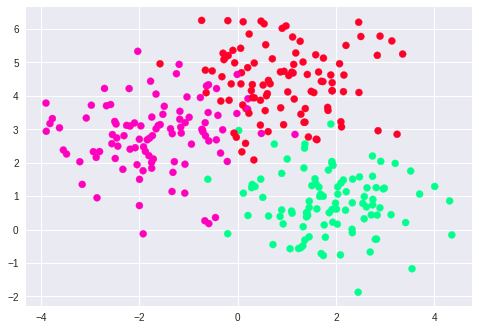

In [16]:
# Let's visualize the data to get an idea what we are dealing with.

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='gist_rainbow')
# alternatively:
# sns.scatterplot(data=df, x="x1", y="x2", hue="y", palette='gist_rainbow')

### Making your Life Easier when Exploring Data (A super brief introduction to Pandas)

While this works well for this particular example, higher dimensional data usually wont be easily visaulized as meaningfully into a 2 or three dimensional plot.

Yet, Python does offer many helpful tools to also explore more complex data.
For convienient data exploration and statistics it is useful turn the "raw" data from it's Numpy representation into a so called Pandas dataframes (or for gridded data an alternative are Xarray datasets).

Without getting into to many details at this point. A dataframe organizes your data so that you can easily perform common tasks such as:

* Sub-selections and filtering of your data: Only certain columns or rows.
* Basic statistis and aggregations such as mean, min, max, avg., or sums of your data.
* Visualisations

In this case you can simply create the data frame directly, but there are also helpers to load data directly from, for example,  CSV files.

In [17]:
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y

In [18]:
# by just passing the variable to the Juypter, Pandas will 
# display the head and the tail of your data frame
df

,x1,x2,y
0,0.063448,5.420804,0
1,1.329670,-0.485700,1
2,1.737308,4.425462,0
3,-1.612835,3.112175,2
4,-1.746445,1.833846,2
...,...,...,...
295,-0.637628,4.091047,0
296,-0.426620,4.215904,2
297,1.367430,-0.316414,1
298,0.231515,3.477349,0


In [19]:
# display some basic statistics about your dataset
df.describe()

,x1,x2,y
count,300.000000,300.000000,300.000000
mean,0.387710,2.676680,1.000000
std,1.806727,1.781110,0.817861
min,-3.896491,-1.874929,0.000000
25%,-0.948666,1.251689,0.000000
50%,0.567872,2.824013,1.000000
75%,1.751903,4.092157,2.000000
max,4.359184,6.254563,2.000000


In [20]:
# get statistics only for single class
df[df['y'] == 0].describe()

,x1,x2,y
count,100.000000,100.000000,100.0
mean,0.942915,4.417918,0.0
std,0.997605,1.009493,0.0
min,-1.576720,2.080384,0.0
25%,0.170426,3.706894,0.0
50%,0.892923,4.429116,0.0
75%,1.624442,5.132506,0.0
max,3.359415,6.254563,0.0


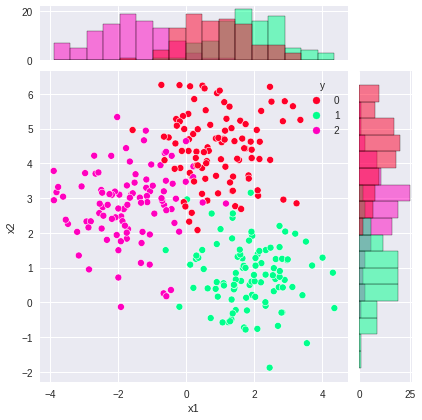

In [23]:
# Especially for multidimensional data it

import seaborn as sns

g = sns.JointGrid(
    data=df, x="x1", y="x2", hue="y",
    palette='gist_rainbow', marginal_ticks=True
)

g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot, bins=17)

sns.histplot(data=df, x='x1', hue='y', palette='gist_rainbow')

<AxesSubplot:xlabel='x1', ylabel='Count'>

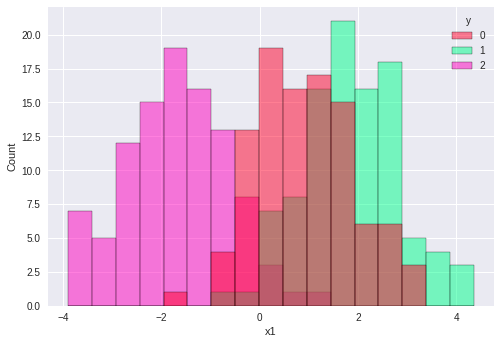

In [25]:
sns.histplot(data=df, x='x1', hue='y', bins=17, palette='gist_rainbow')

<AxesSubplot:xlabel='x2', ylabel='Count'>

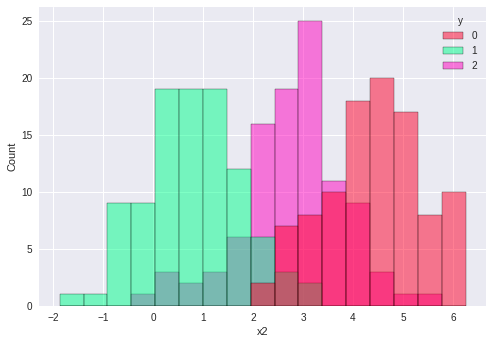

In [26]:
sns.histplot(data=df, x='x2', hue='y', bins=17, palette='gist_rainbow')

## Decision Trees in ScikitLearn

You don't have to implement a decision tree yourself, instead you can use an implementation provided by the community.
A good collection to get started on different model are provided by Scikit-Learn. While these may not be the fasted implementations around, they are well suited to get started and the project has good documentation.

In [30]:
### Classification

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=1, random_state=0)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [31]:
### Regression

from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

## Visualizing and Introspecting your Models

Earlier we mentioned that visualizing your results, and less so your models is not always easy. Here we would like to introduce two views on how to visualize or at least introspect the decision bounderies.

Using these tools, you should be able to perform some sanity checks and discover shortcomings of your models that you can use to determine where to focus on as you iterate to improve it.

In [32]:
from sklearn.tree import plot_tree

[Text(223.2, 224.235, 'X[0] <= -0.343\ngini = 0.667\nsamples = 300\nvalue = [100, 100, 100]'),
 Text(111.6, 74.745, 'gini = 0.116\nsamples = 98\nvalue = [5, 1, 92]'),
 Text(334.79999999999995, 74.745, 'gini = 0.537\nsamples = 202\nvalue = [95, 99, 8]')]

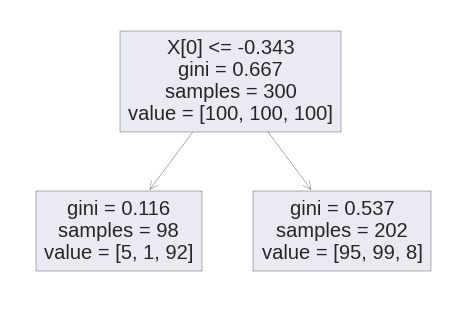

In [33]:
plot_tree(clf)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import warnings



def visualize_tree(
        estimator, 
        X, y, 
        boundaries=False,
        xlim=None, ylim=None):
    """
    Adapted from: 
    https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/scikit-learn/fig_code/figures.py
    
    Fixed deprecation warning for pcolormesh with shading='auto'
    Changed colormap and other appearance to have continuity across examples.
    
    """
    estimator.fit(X, y)

    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='gist_rainbow', shading='auto')
    plt.clim(y.min(), y.max())

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='gist_rainbow')
    #plt.axis('off')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    plt.clim(y.min(), y.max())
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i < 0:
            return

        tree = estimator.tree_
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())


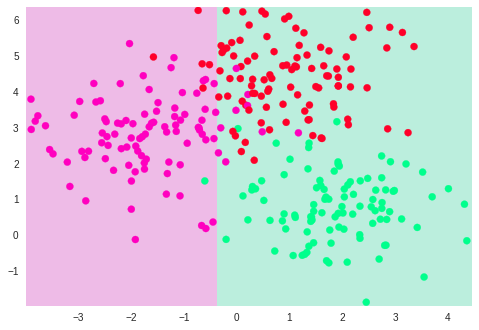

In [35]:
import numpy as np
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=1, random_state=0)
visualize_tree(clf, X, y)

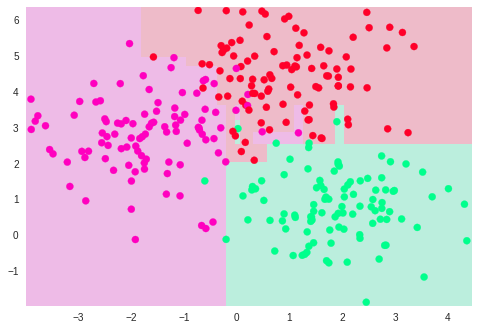

In [36]:
# Overfitting

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

visualize_tree(clf, X, y)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


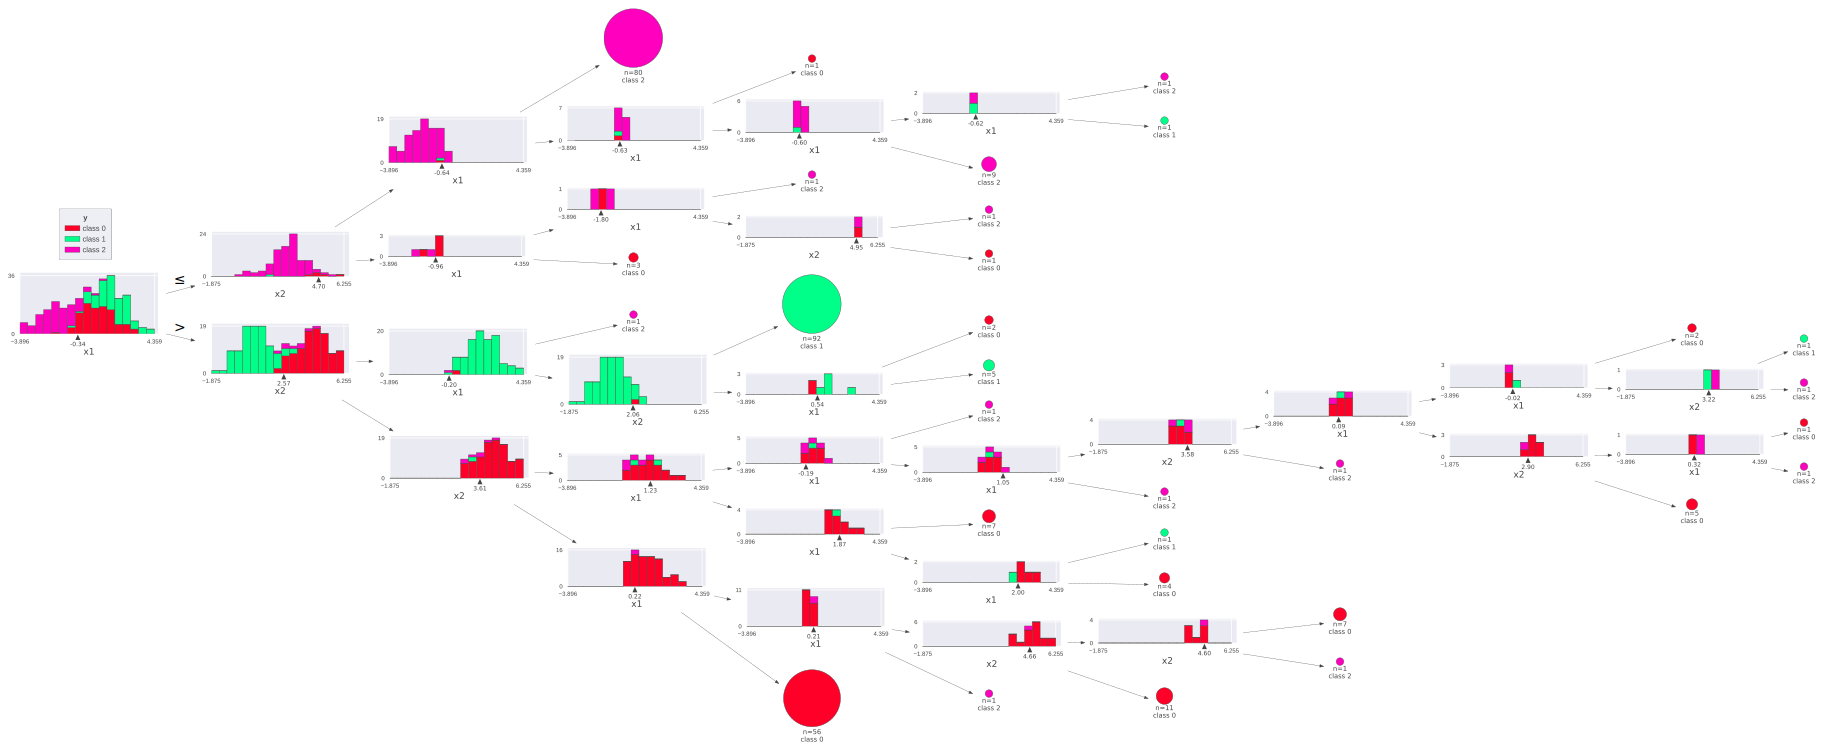

In [37]:
from dtreeviz.trees import dtreeviz # remember to load the package

# a little helper to tie our examples together so that colors match up across examples
import matplotlib
cmap = matplotlib.cm.get_cmap('gist_rainbow', 3)
colors = [cmap(i) for i in range(cmap.N)] 
#colors = [matplotlib.colors.to_hex(cmap(i), keep_alpha=True) for i in range(cmap.N)] 
colors = [matplotlib.colors.to_hex(cmap(i), keep_alpha=False) for i in range(cmap.N)] 
color_map = [None, None, None, colors]

viz = dtreeviz(clf, X, y, 
               feature_names = ['x1', 'x2'], target_name="y", 
               orientation ='LR', colors={'classes': color_map})
viz

In [38]:
## A 

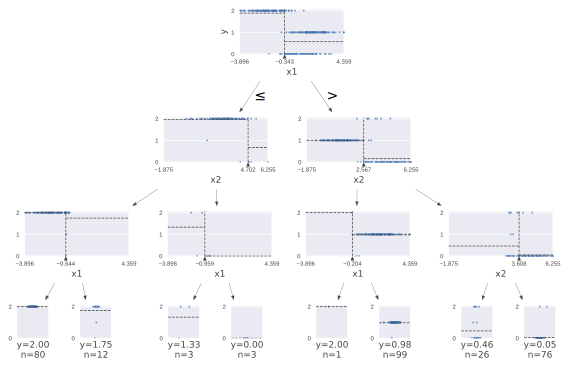

In [40]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(regr, X, y, 
               feature_names = ['x1', 'x2'], target_name="y", 
               orientation ='TB', colors={'classes': color_map})
viz

## A Earth System Data Example (e.g., Weatherbench, ...)?

Xarray + PyTorch --> keep a few unoptimized parts, for which we could dive deep in the pre-processing course.

Classification: Maybe something like month from temperature + precipation might have enough signal also for short training runs.
Regression: Could extract a timeseries to fit a curve, while also not needing to much data (and thus have quick training turnaround times to just so barely showcase some predictive skill)